In [1]:
import os
from linares_plot import *
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.optimize import curve_fit


In [2]:
### Aprox. 10.000.000 de rows 
### Takes about 40min to load
### path_ = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\firing_rates_100' ##sliding window of 100
### path_ = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\firing_rates_10' ##sliding window of 10
path_ = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\firing_rates'  ##sliding window of 10
files = os.listdir(path_)
frames=[]
for f in files:
    fx=pd.read_excel( os.path.join(path_,f))
    print(f)
    frames.append(fx)
#
df=pd.concat(frames)

1364705.xlsx
1365201.xlsx
1365301.xlsx
1365501.xlsx
1365701.xlsx
1365802.xlsx
1365902.xlsx
1366002.xlsx
1366101.xlsx
1367701.xlsx
1367802.xlsx
1367903.xlsx
1369702.xlsx
1369901.xlsx
1370002.xlsx
1370202.xlsx
1371202.xlsx
1371901.xlsx
1372003.xlsx
1372301.xlsx
1372402.xlsx
189139306.xlsx
1891406.xlsx
1891407.xlsx
189141804.xlsx
1891421.xlsx
1891436.xlsx
189144701.xlsx
189144904.xlsx
189147105.xlsx
189150602.xlsx
189151102.xlsx
189152601.xlsx
189154404.xlsx
189154602.xlsx
189155501.xlsx
189156205.xlsx
189157901.xlsx
189158601.xlsx
1891598.xlsx
189160302.xlsx
189160702.xlsx
189161604.xlsx
1891626.xlsx
189163101.xlsx
189163701.xlsx
189164103.xlsx
189164404.xlsx
189164801.xlsx
189164803.xlsx
189165003.xlsx
1891653.xlsx
189168701.xlsx
189169502.xlsx
189171003.xlsx
189171602.xlsx
189172801.xlsx
189173101.xlsx
189173801.xlsx
189174201.xlsx
189175201.xlsx
189175801.xlsx
189176101.xlsx
189176501.xlsx
189176901.xlsx
189177402.xlsx
189177701.xlsx
1891783.xlsx
189179001.xlsx
189179002.xlsx
1891793.

In [3]:
len(df)

17518400

In [7]:
fifty = [  1367701,   1370202,   1371202,   1372301, 189168701, 189169502,
       189171003, 189171602, 189172801, 189173101, 189175201, 189175801,
       189176501, 189176901, 189177402, 189177701,   1891783,   1891793,
       189179702, 189180001, 189181001,   1891819, 189182202, 189182501,
       189182901, 189183201, 189183402, 189184601,   1891857, 189189601,
       189192001, 189192201, 189196301]

forty = [  1370202,   1372301, 189168701, 189169502, 189171003, 189173101,
       189175801, 189176501, 189177402,   1891783, 189179702, 189180001,
       189181001,   1891819, 189182202, 189182901, 189192201]

therty=[  1370202, 189173101, 189175801, 189176501,   1891783,   1891819,
       189192201]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


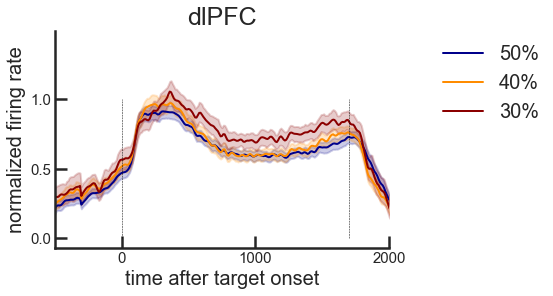

In [55]:
df_50= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==0) & 
                 (df['neuron'].isin(fifty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_50, color='darkblue', linewidth=2, label='50%')



df_40 = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==0) & 
                 (df['neuron'].isin(forty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_40, color='darkorange', linewidth=2, label='40%')


df_30 = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==0) & 
                 (df['neuron'].isin(therty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_30, color='darkred', linewidth=2, label='30%')


#df_pfc_100_less = df_100_pfc.loc[df_100_pfc['neuron'].isin(perf_100_best)]
#sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_100_less, color='darkgreen', linewidth=2)

plt.xlim(-500, 2000)

#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.fill_between([0,99], [1.1, 1.1], color='grey', alpha=0.2)
plt.fill_between([100,199], [1, 1], color='blue', alpha=0.2)
# plt.fill_between([200,299], [1, 1], color='darkorange', alpha=0.2)
# plt.fill_between([300,399], [1, 1], color='green', alpha=0.2)
# plt.fill_between([900,999], [1, 1], color='red', alpha=0.2)
plt.plot([1700,1700], [0,1], '--',  color='gold', linewidth=0.5)
plt.ylim(0.2,1.2)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


([<matplotlib.axis.YTick at 0x1d2296c1630>,
 <a list of 3 Text yticklabel objects>)

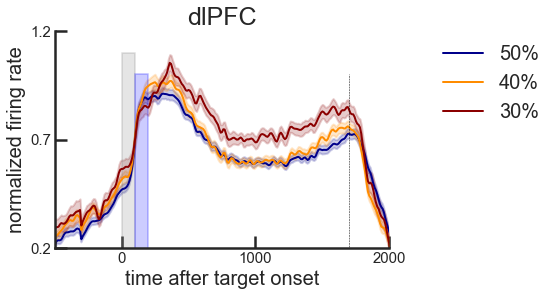

In [238]:
df_50= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==0) & 
                 (df['neuron'].isin(fifty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_50, ci=68, color='darkblue', linewidth=2, label='50%')



df_40 = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==0) & 
                 (df['neuron'].isin(forty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_40, ci=68, color='darkorange', linewidth=2, label='40%')


df_30 = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==0) & 
                 (df['neuron'].isin(therty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_30, ci=68, color='darkred', linewidth=2, label='30%')


#df_pfc_100_less = df_100_pfc.loc[df_100_pfc['neuron'].isin(perf_100_best)]
#sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_100_less, color='darkgreen', linewidth=2)

plt.xlim(-500, 2000)

#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset (ms)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.fill_between([0,99], [1.1, 1.1], color='grey', alpha=0.2)
plt.fill_between([100,199], [1, 1], color='blue', alpha=0.2)
# plt.fill_between([200,299], [1, 1], color='darkorange', alpha=0.2)
# plt.fill_between([300,399], [1, 1], color='green', alpha=0.2)
# plt.fill_between([900,999], [1, 1], color='red', alpha=0.2)
plt.plot([1700,1700], [0,1], '--',  color='black', linewidth=0.5)
plt.ylim(0.2,1.2)
plt.yticks([0.2,0.7,1.2])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


([<matplotlib.axis.YTick at 0x1d21d12c860>,
 <a list of 3 Text yticklabel objects>)

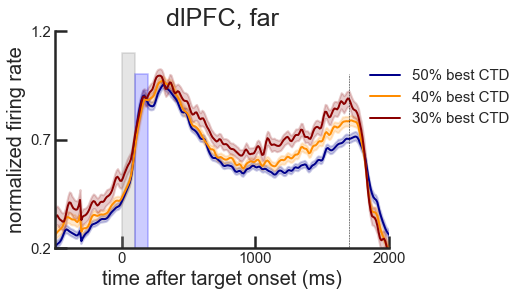

In [242]:
df_50= df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==0) & 
                 (df['neuron'].isin(fifty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_50, ci=68, color='darkblue', linewidth=2, label='50% best CTD')



df_40 = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==0) & 
                 (df['neuron'].isin(forty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_40, ci=68, color='darkorange', linewidth=2, label='40% best CTD')


df_30 = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==0) & 
                 (df['neuron'].isin(therty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_30, ci=68, color='darkred', linewidth=2, label='30% best CTD')


#df_pfc_100_less = df_100_pfc.loc[df_100_pfc['neuron'].isin(perf_100_best)]
#sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_100_less, color='darkgreen', linewidth=2)

plt.xlim(-500, 2000)

#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.4, 0.5), prop={'size': 15})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC, far', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset (ms)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.fill_between([0,99], [1.1, 1.1], color='grey', alpha=0.2)
plt.fill_between([100,199], [1, 1], color='blue', alpha=0.2)
# plt.fill_between([200,299], [1, 1], color='darkorange', alpha=0.2)
# plt.fill_between([300,399], [1, 1], color='green', alpha=0.2)
# plt.fill_between([900,999], [1, 1], color='red', alpha=0.2)
plt.plot([1700,1700], [0,1], '--',  color='black', linewidth=0.5)
plt.ylim(0.2,1.2)
plt.yticks([0.2,0.7,1.2])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


([<matplotlib.axis.YTick at 0x21b95c22710>,
 <a list of 3 Text yticklabel objects>)

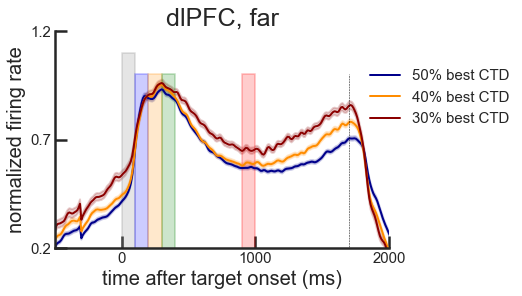

In [101]:
df_50= df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & 
                 (df['neuron'].isin(fifty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_50, ci=68, color='darkblue', linewidth=2, label='50% best CTD')



df_40 = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & 
                 (df['neuron'].isin(forty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_40, ci=68, color='darkorange', linewidth=2, label='40% best CTD')


df_30 = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & 
                 (df['neuron'].isin(therty))] 

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_30, ci=68, color='darkred', linewidth=2, label='30% best CTD')


#df_pfc_100_less = df_100_pfc.loc[df_100_pfc['neuron'].isin(perf_100_best)]
#sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_pfc_100_less, color='darkgreen', linewidth=2)

plt.xlim(-500, 2000)

#plt.yticks([0,0.5,1])
plt.legend( loc=4, frameon=False, bbox_to_anchor=(1.4, 0.5), prop={'size': 15})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC, far', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset (ms)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.fill_between([0,99], [1.1, 1.1], color='grey', alpha=0.2)
plt.fill_between([100,199], [1, 1], color='blue', alpha=0.2)
plt.fill_between([200,299], [1, 1], color='darkorange', alpha=0.2)
plt.fill_between([300,399], [1, 1], color='green', alpha=0.2)
plt.fill_between([900,999], [1, 1], color='red', alpha=0.2)
plt.plot([1700,1700], [0,1], '--',  color='black', linewidth=0.5)
plt.ylim(0.2,1.2)
plt.yticks([0.2,0.7,1.2])

In [107]:
x

array([-800, -790, -780, -770, -760, -750, -740, -730, -720, -710, -700,
       -690, -680, -670, -660, -650, -640, -630, -620, -610, -600, -590,
       -580, -570, -560, -550, -540, -530, -520, -510, -500, -490, -480,
       -470, -460, -450, -440, -430, -420, -410, -400, -390, -380, -370,
       -360, -350, -340, -330, -320, -310, -300, -290, -280, -270, -260,
       -250, -240, -230, -220, -210, -200, -190, -180, -170, -160, -150,
       -140, -130, -120, -110, -100,  -90,  -80,  -70,  -60,  -50,  -40,
        -30,  -20,  -10,    0,   10,   20,   30,   40,   50,   60,   70,
         80,   90,  100,  110,  120,  130,  140,  150,  160,  170,  180,
        190,  200,  210,  220,  230,  240,  250,  260,  270,  280,  290,
        300,  310,  320,  330,  340,  350,  360,  370,  380,  390,  400,
        410,  420,  430,  440,  450,  460,  470,  480,  490,  500,  510,
        520,  530,  540,  550,  560,  570,  580,  590,  600,  610,  620,
        630,  640,  650,  660,  670,  680,  690,  7

## Parabolic fit and correlotion to decoding accuracy

30 3.6905667342627494e-07
40 4.250738053056289e-07
50 5.046418564074221e-07


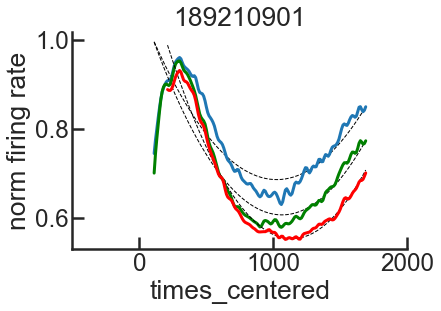

In [128]:
N = df_30
N1 = N.loc[(N['time_centered']>100) & (N['time_centered']<1700) ]
x = N1.time_centered.unique()
y = N1.groupby('time_centered').norm_firing_gauss.mean().values
popt, pcov = curve_fit(parabola, x, y, method='dogbox',  maxfev=1000 )
y_fit = [popt[0]*x**2 + popt[1]*x + popt[2] for x in x]
plt.plot(x, y_fit, 'k--', linewidth=1, label='parabolic fit')
plt.plot(x, y)
plt.title(str(neuron))
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlim(-500,2000)
plt.ylabel('norm firing rate')
plt.xlabel('times_centered')
print(30, popt[0])

###

N = df_40
N1 = N.loc[(N['time_centered']>100) & (N['time_centered']<1700) ]
x = N1.time_centered.unique()
y = N1.groupby('time_centered').norm_firing_gauss.mean().values
popt, pcov = curve_fit(parabola, x, y, method='dogbox',  maxfev=1000 )
y_fit = [popt[0]*x**2 + popt[1]*x + popt[2] for x in x]
plt.plot(x, y_fit, 'k--', linewidth=1, label='parabolic fit')
plt.plot(x, y, 'g')
plt.title(str(neuron))
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlim(-500,2000)
plt.ylabel('norm firing rate')
plt.xlabel('times_centered')
print(40, popt[0])



N = df_50
N1 = N.loc[(N['time_centered']>200) & (N['time_centered']<1700) ]
x = N1.time_centered.unique()
y = N1.groupby('time_centered').norm_firing_gauss.mean().values
popt, pcov = curve_fit(parabola, x, y, method='dogbox',  maxfev=1000 )
y_fit = [popt[0]*x**2 + popt[1]*x + popt[2] for x in x]
plt.plot(x, y_fit, 'k--', linewidth=1, label='parabolic fit')
plt.plot(x, y, 'r')
plt.title(str(neuron))
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlim(-500,2000)
plt.ylabel('norm firing rate')
plt.xlabel('times_centered')
print(50, popt[0])
plt.show()



In [8]:
df_30 = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==0) & 
                 (df['neuron'].isin(therty))] 

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


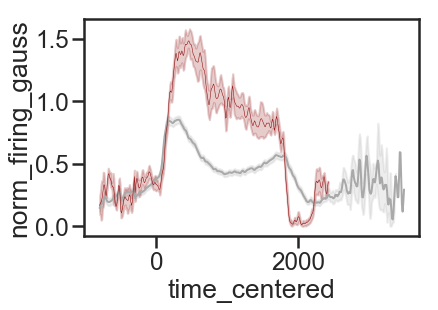

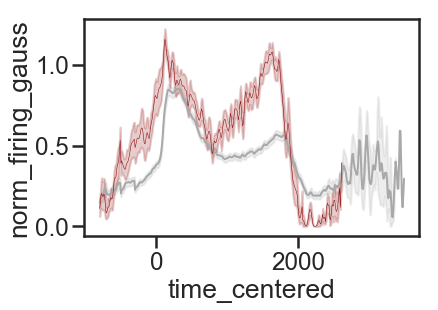

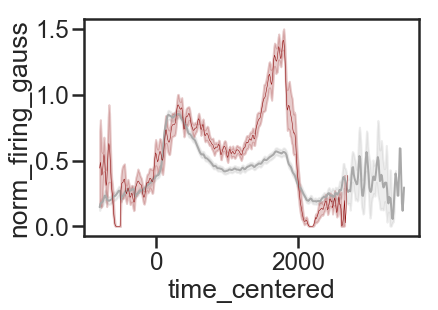

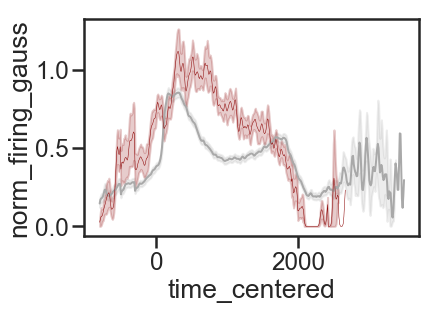

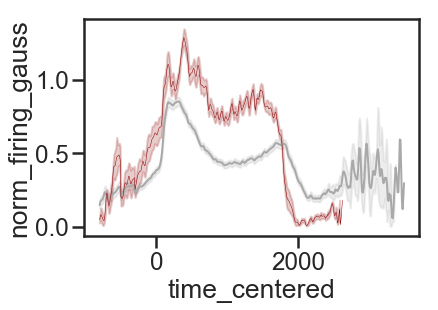

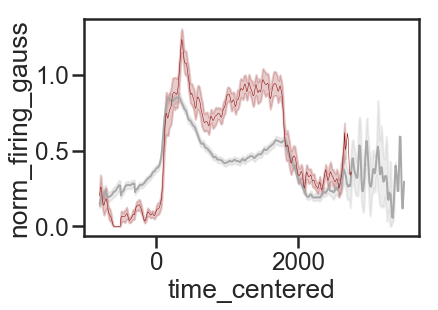

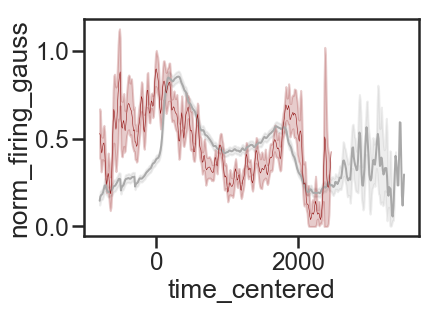

In [11]:
df_control_pfc = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') & (df['performance']==1) ]

for n in therty:
    plt.figure()
    sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
    sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_30.loc[df_30['neuron']==n], ci=68, color='darkred', linewidth=0.5)
    plt.show()
    
    

In [182]:
def heatmap(data, title, dist_time='None', fs1=20, fs2=12):
    ax = sns.heatmap(data,vmin=50, vmax=100, cmap= 'viridis_r',
                    cbar_kws={"shrink": .82, 'ticks' : [50, 70, 90], 'label': 'decoding error ($^\circ$)'}) ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(fs1)
    ax.figure.axes[-1].tick_params(labelsize=fs2)
    plt.gca().set_title(title, fontsize=fs1)
    plt.gca().set_xticks([0,5,10,15,20])
    plt.gca().set_xticklabels([-500,0,500,1000,1500])
    plt.gca().set_ylim(0,24)
    plt.gca().set_yticks([0,5,10,15,20])
    plt.gca().set_yticklabels([-500,0,500,1000,1500])
    plt.xticks(fontsize=fs2, rotation=0)
    plt.yticks(fontsize=fs2)
    plt.gca().set_ylabel('training time (ms)', fontsize=fs1, labelpad=12)
    plt.gca().set_xlabel('testing time (ms)', fontsize=fs1, labelpad=12)
    ##### Target presented at 500ms
    ##### Stimulus duration: 100ms
    ##### Distractor presented with different SOA
    plt.plot([500/100, 500/100], [23,23], markersize=10, color='y', marker='v')
    if dist_time != 'None':
        plt.plot([(600+dist_time)/100, (600+dist_time)/100], [23,23], markersize=10, color='r', marker='v')
                
    
    plt.show(block=False)

In [178]:
def parabola(x, a, b, c):
    return a*x**2 + b*x + c


def parabola_cent(x, a, b, c):
    return a*(x-1)**2 + b*x + c

### Loop for each neuron

In [ ]:
alphas_=[]

#N_all = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['performance'].isin([1,2]))] ##incorrect, not working
#N_all = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==0)] ### not working
#N_all = df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & (df['performance']==1)] ##not working
N_all = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==0)] ##not working
##N_all = df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==0)]

df_control_pfc['time_centered_s'] = df_control_pfc['time_centered']/1000

for idx, neuron in enumerate(N_all.neuron.unique()):
    N = N_all.loc[N_all['neuron']==neuron]
    N['time_centered_s'] = N['time_centered']/1000
    plt.figure()
    sns.lineplot(x='time_centered_s', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
    sns.lineplot(x='time_centered_s', y='norm_firing_gauss', data=N, ci=68, color='darkred', linewidth=0.5)
    N1 = N.loc[(N['time_centered']>100) & (N['time_centered']<1700) ]
    x = N1.time_centered.unique()/1000
    y = N1.groupby('time_centered').norm_firing_gauss.mean().values
    popt, pcov = curve_fit(parabola_cent, x, y, method='dogbox',  maxfev=1000 )
    #y_fit = [popt[0]*x**2 + popt[1]*x + popt[2] for x in x]
    y_fit = [popt[0]*(x-1)**2 + popt[1]*x + popt[2] for x in x]
    plt.plot(x, y_fit, 'k--', linewidth=1, label='parabolic fit')
    plt.title(str(neuron))
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.xlim(-0.5,2)
    plt.ylabel('norm firing rate')
    plt.xlabel('times_centered')
    print(idx, neuron, round(popt[0],3))
    plt.show()
    alphas_.append([neuron, round(popt[0],3)])


In [139]:
path_CTD = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\CTD\\correct_trials'

heatmaps_pfc_100=[]

path_load = os.path.join(path_CTD, 'hm_pfc_100.xlsx')
xl = pd.ExcelFile(path_load)
pfc_100_neurons = xl.sheet_names 

for n in pfc_100_neurons:
    heatmaps_pfc_100.append( pd.read_excel(path_load, sheet_name=n).iloc[:,1:].values )

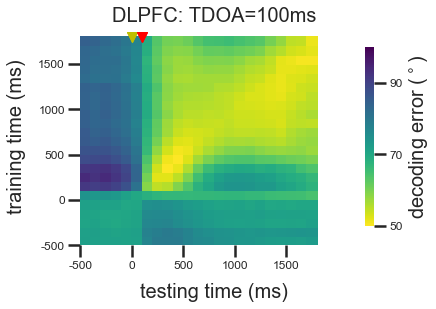

In [141]:
### Decoding value for each neuron
H = [pd.DataFrame(heatmaps_pfc_100[x]) for x in range(len(heatmaps_pfc_100))]
H_mean = pd.concat(H).groupby(level=0).mean()
heatmap(H_mean, 'DLPFC: TDOA=' +str(100)+'ms', dist_time=0)

decoding_500=[]
for i, neur in enumerate(pfc_100_neurons):
    last_500 = np.mean([heatmaps_pfc_100[i][22,22], heatmaps_pfc_100[i][21,21],
             heatmaps_pfc_100[i][20,20], heatmaps_pfc_100[i][19,19],
             heatmaps_pfc_100[i][18,18]])
    last_500=np.round(last_500,3)
    decoding_500.append([last_500, neur] )
#


In [142]:
decoding_strenght = pd.DataFrame(decoding_500)
decoding_strenght.columns=['DS', 'neuron']
decoding_strenght

,DS,neuron
0,50.514,1367701
1,53.000,1367802
2,62.766,1367903
3,65.312,1369702
4,63.474,1369901
...,...,...
58,51.524,189196401
59,70.528,189209101
60,70.278,189209503
61,66.772,189210001


In [143]:
Alphas = pd.DataFrame(alphas_)
Alphas.columns=['neuron', 'alpha']
Alphas

,neuron,alpha
0,1367701,3.497986e-09
1,1367802,4.618257e-07
2,1367903,5.084666e-07
3,1369702,6.503794e-07
4,1369901,4.310788e-07
...,...,...
58,189196401,6.398531e-07
59,189209101,3.722861e-07
60,189209503,4.376012e-07
61,189210001,4.945493e-07


In [144]:
dss=[]
for i in range(len(Alphas)):
    d_s = decoding_strenght.loc[decoding_strenght['neuron']== str(Alphas['neuron'].iloc[i]), 'DS' ].iloc[0]
    dss.append(d_s)
    
    
Alphas['DS']=dss

In [145]:
#Alphas['alpha_1000'] = Alphas['alpha']*10000
Alphas['decoding'] = 1/Alphas['DS']

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


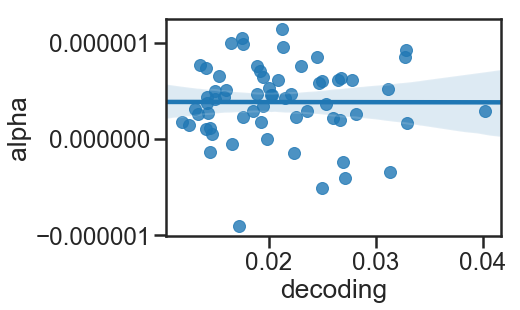

In [146]:
sns.regplot(x='decoding', y='alpha', data=Alphas)

In [ ]:
#### Save Heatmaps

In [158]:
def heatmap_save(data, title, save_name, dist_time='None', fs1=20, fs2=12):
    ax = sns.heatmap(data,vmin=50, vmax=100, cmap= 'viridis_r',
                    cbar_kws={"shrink": .82, 'ticks' : [50, 75, 100], 'label': 'decoding error ($^\circ$)'}) ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(fs1)
    ax.figure.axes[-1].tick_params(labelsize=fs2)
    plt.gca().set_title(title, fontsize=fs1)
    plt.gca().set_xticks([0,5,10,15,20])
    plt.gca().set_xticklabels([-500,0,500,1000,1500])
    plt.gca().set_ylim(0,24)
    plt.gca().set_yticks([0,5,10,15,20])
    plt.gca().set_yticklabels([-500,0,500,1000,1500])
    plt.xticks(fontsize=fs2, rotation=0)
    plt.yticks(fontsize=fs2)
    plt.gca().set_ylabel('training time (ms)', fontsize=fs1, labelpad=12)
    plt.gca().set_xlabel('testing time (ms)', fontsize=fs1, labelpad=12)
    ##### Target presented at 500ms
    ##### Stimulus duration: 100ms
    ##### Distractor presented with different SOA
    plt.plot([500/100, 500/100], [23,23], markersize=10, color='black', marker='v')
    if dist_time != 'None':
        plt.plot([(600+dist_time)/100, (600+dist_time)/100], [23,23], markersize=10, color='darkred', marker='v')
                
    
    plt.show(block=False)
    figure = ax.get_figure()    
    figure.savefig('C:\\Users\\David\\Desktop\\heatmap_' + save_name + '.svg', transparent=True)
    #ax.savefig('C:\\Users\\David\\Desktop\\heatmap.svg', transparent=True)
    



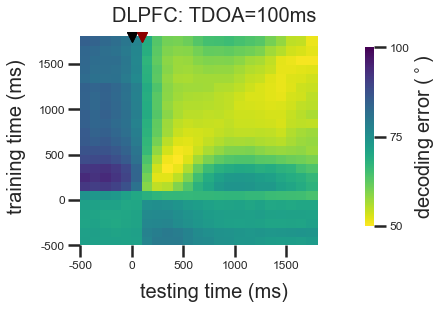

In [159]:
path_CTD = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\CTD\\correct_trials'

heatmaps_pfc_100=[]

path_load = os.path.join(path_CTD, 'hm_pfc_100.xlsx')
xl = pd.ExcelFile(path_load)
pfc_100_neurons = xl.sheet_names 

for n in pfc_100_neurons:
    heatmaps_pfc_100.append( pd.read_excel(path_load, sheet_name=n).iloc[:,1:].values )
    

H = [pd.DataFrame(heatmaps_pfc_100[x]) for x in range(len(heatmaps_pfc_100))]
H_mean = pd.concat(H).groupby(level=0).mean()
    
heatmap_save(H_mean, 'DLPFC: TDOA=' +str(100)+'ms', 'dlpfc_100', dist_time=0)

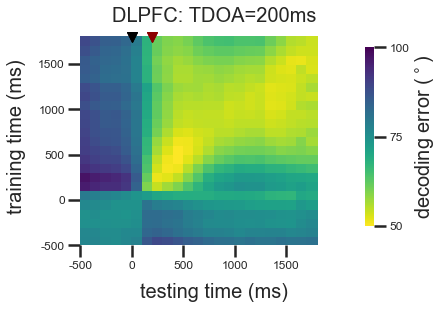

In [165]:
path_CTD = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\CTD\\correct_trials'

heatmaps_pfc_200=[]

path_load = os.path.join(path_CTD, 'hm_pfc_200.xlsx')
xl = pd.ExcelFile(path_load)
pfc_200_neurons = xl.sheet_names 

for n in pfc_200_neurons:
    heatmaps_pfc_200.append( pd.read_excel(path_load, sheet_name=n).iloc[:,1:].values )
    

H = [pd.DataFrame(heatmaps_pfc_200[x]) for x in range(len(heatmaps_pfc_200))]
H_mean = pd.concat(H).groupby(level=0).mean()
    
heatmap_save(H_mean, 'DLPFC: TDOA=' +str(200)+'ms', 'dlpfc_200', dist_time=100)

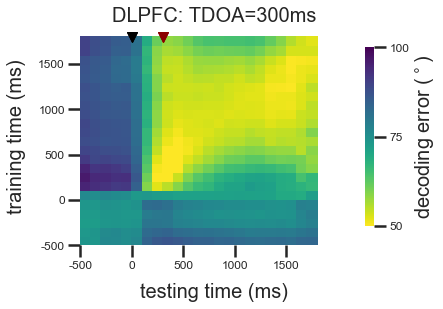

In [164]:
path_CTD = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\CTD\\correct_trials'

heatmaps_pfc_300=[]

path_load = os.path.join(path_CTD, 'hm_pfc_300.xlsx')
xl = pd.ExcelFile(path_load)
pfc_300_neurons = xl.sheet_names 

for n in pfc_300_neurons:
    heatmaps_pfc_300.append( pd.read_excel(path_load, sheet_name=n).iloc[:,1:].values )
    

H = [pd.DataFrame(heatmaps_pfc_300[x]) for x in range(len(heatmaps_pfc_300))]
H_mean = pd.concat(H).groupby(level=0).mean()
    
heatmap_save(H_mean, 'DLPFC: TDOA=' +str(300)+'ms', 'dlpfc_300', dist_time=200)

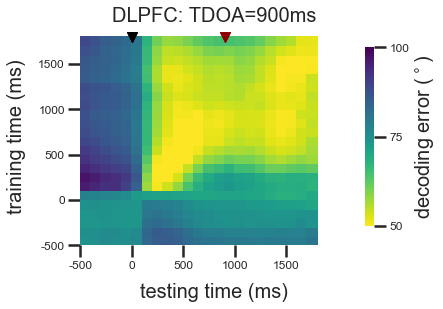

In [163]:
path_CTD = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\CTD\\correct_trials'

heatmaps_pfc_900=[]

path_load = os.path.join(path_CTD, 'hm_pfc_900.xlsx')
xl = pd.ExcelFile(path_load)
pfc_900_neurons = xl.sheet_names 

for n in pfc_900_neurons:
    heatmaps_pfc_900.append( pd.read_excel(path_load, sheet_name=n).iloc[:,1:].values )
    

H = [pd.DataFrame(heatmaps_pfc_900[x]) for x in range(len(heatmaps_pfc_900))]
H_mean = pd.concat(H).groupby(level=0).mean()
    
heatmap_save(H_mean, 'DLPFC: TDOA=' +str(900)+'ms', 'dlpfc_900', dist_time=800)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


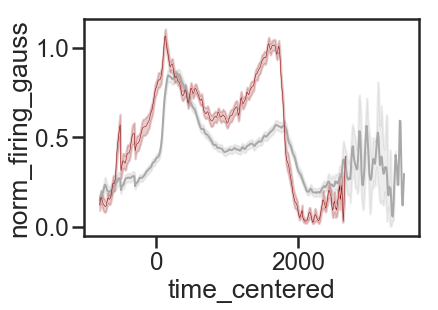

In [43]:
N = df.loc[(df['neuron']==therty[1]) & (df['TDconf']==1) & (df['brain_region']=='DLPFC') & (df['performance'].isin([1,2]))]
plt.figure()
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=N, ci=68, color='darkred', linewidth=0.5)
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


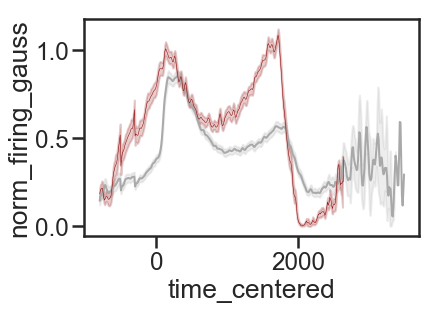

In [166]:
N = df_30.loc[df_30['neuron']==therty[1]]
plt.figure()
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=N, ci=68, color='darkred', linewidth=0.5)
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


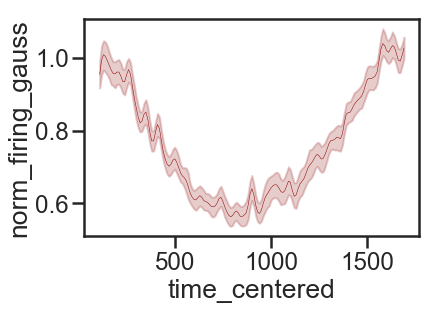

In [168]:
N1 = N.loc[(N['time_centered']>100) & (N['time_centered']<1700) ]
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=N1, ci=68, color='darkred', linewidth=0.5)

In [174]:
x/1000

array([0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53,
       1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.

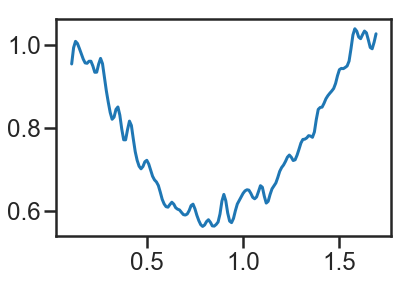

In [175]:
x = N1.time_centered.unique()/1000
y = N1.groupby('time_centered').norm_firing_gauss.mean().values
plt.plot(x,y)

0.7719172654746649

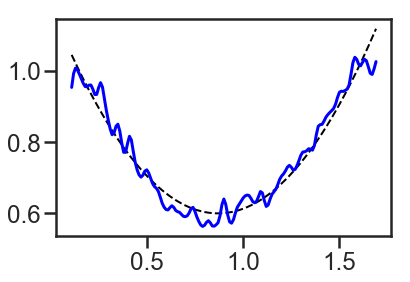

In [176]:
popt, pcov = curve_fit(parabola, x, y, method='dogbox',  maxfev=1000 )
y_fit = [popt[0]*x**2 + popt[1]*x + popt[2] for x in x]
plt.plot(x, y_fit, 'k--', linewidth=2, label='parabolic fit')
plt.plot(x,y,'b')
popt[0]

0.7719172663436633

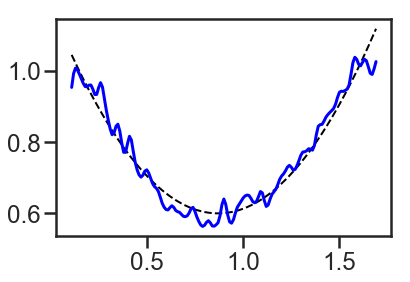

In [177]:
popt, pcov = curve_fit(parabola_cent, x, y, method='dogbox',  maxfev=1000 )
y_fit = [popt[0]*(x-1)**2 + popt[1]*x + popt[2] for x in x]
plt.plot(x, y_fit, 'k--', linewidth=2, label='parabolic fit')
plt.plot(x,y,'b')
popt[0]

6.573042175155983e-07

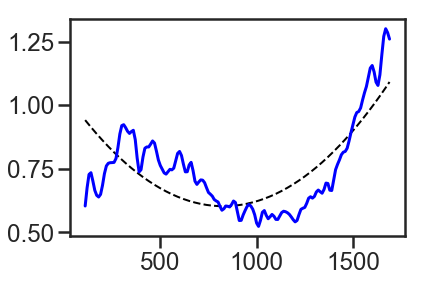

In [36]:
popt, pcov = curve_fit(parabola, x, y, method='dogbox',  maxfev=1000 )
y_fit = [popt[0]*x**2 + popt[1]*x + popt[2] for x in x]
plt.plot(x, y_fit, 'k--', linewidth=2, label='parabolic fit')
plt.plot(x,y,'b')
popt[0]

6.708102432411087e-07

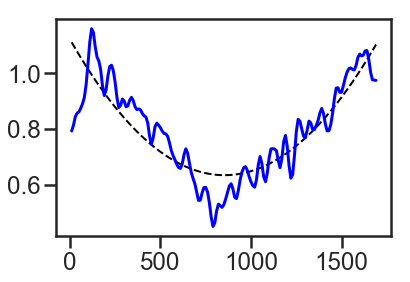

In [29]:
popt, pcov = curve_fit(parabola, x, y, method='dogbox',  maxfev=1000 )
y_fit = [popt[0]*x**2 + popt[1]*x + popt[2] for x in x]
plt.plot(x, y_fit, 'k--', linewidth=2, label='parabolic fit')
plt.plot(x,y,'b')
popt[0]

In [12]:

df_40 = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & 
                 (df['neuron'].isin(forty))] 

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


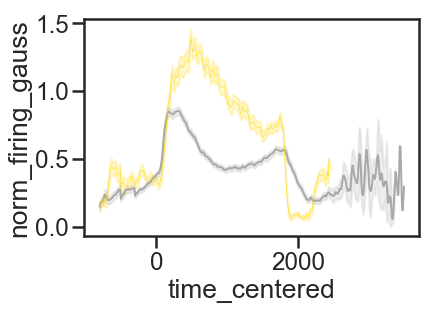

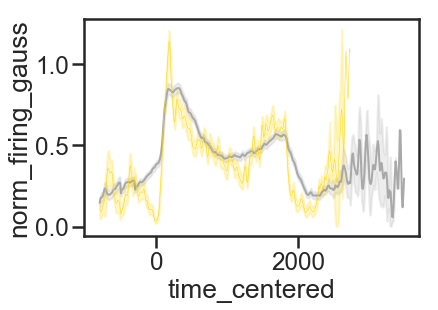

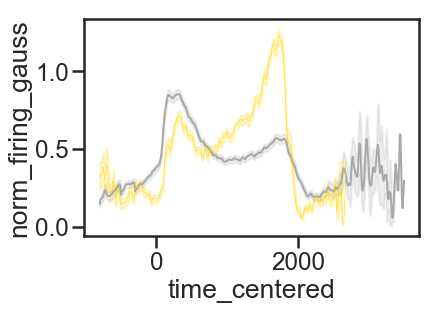

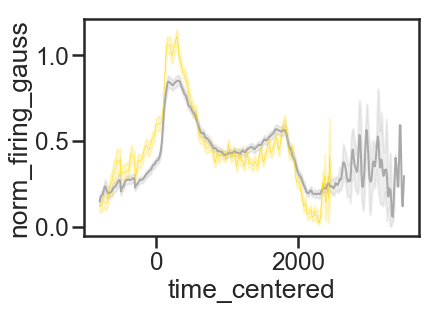

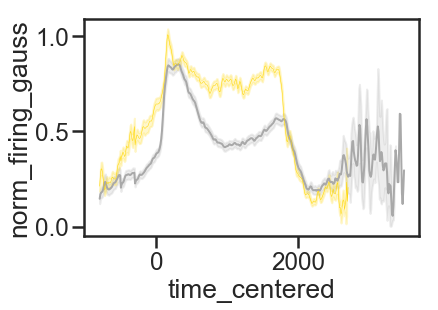

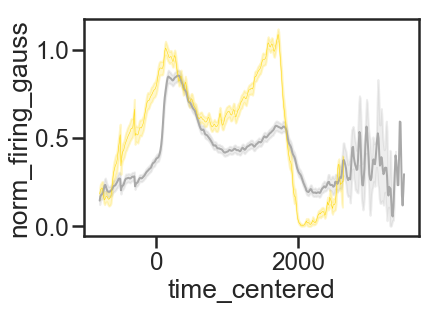

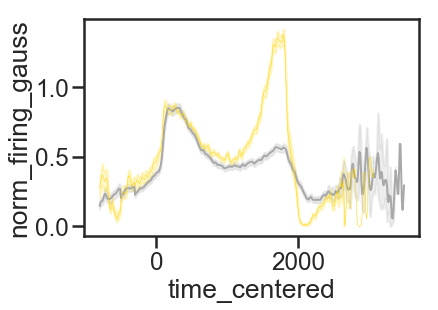

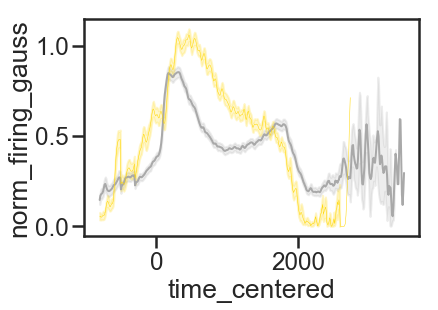

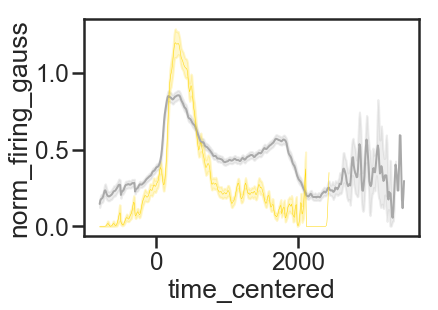

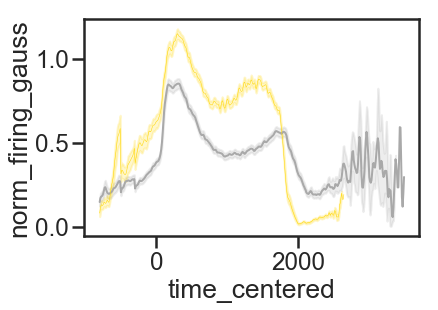

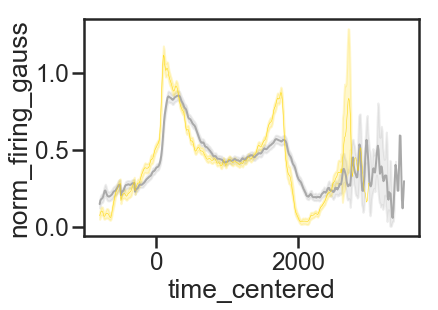

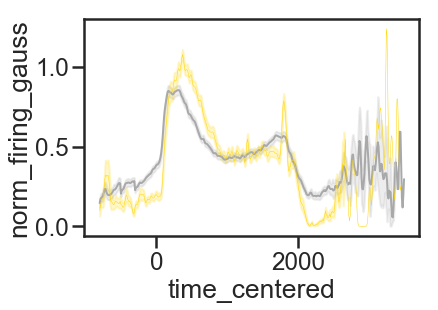

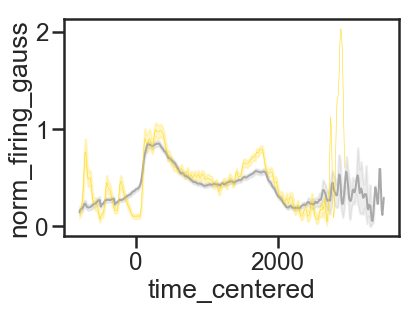

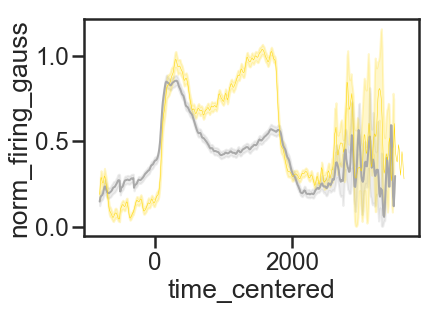

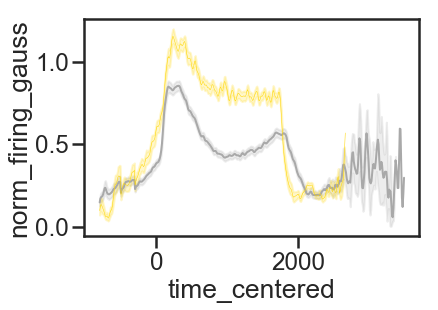

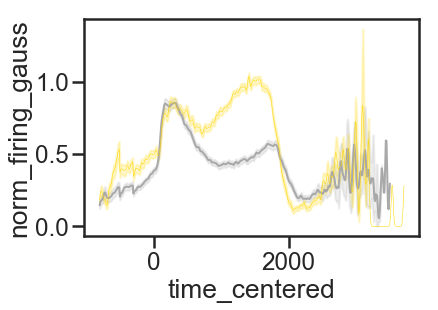

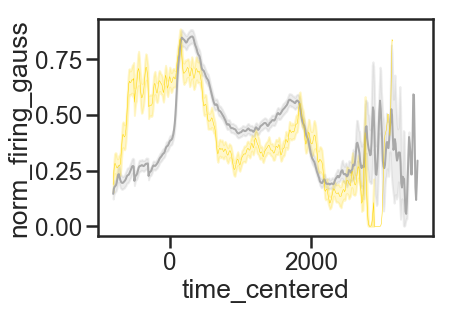

In [13]:
for n in forty:
    plt.figure()
    sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
    sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_40.loc[df_40['neuron']==n], ci=68, color='gold', linewidth=0.5)
    plt.show()
    

In [ ]:
##The right tendency for this neurons!

In [56]:
other_ = df.loc[(df['brain_region']=='DLPFC')].neuron.unique() 
other_ = [ele for ele in other_ if ele not in therty]
len(other_)

56

In [57]:
pfc_=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in therty:
        corr_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>TDOA) & (df['time_centered']<TDOA+100), 'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>TDOA) & (df['time_centered']<TDOA+100), 'norm_firing_gauss'].mean() 
        pfc_.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc=pd.DataFrame(pfc_)
df_pfc.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']

In [58]:
df.head()

,Unnamed: 0,firing_gauss,times,trial,TDOA,TDconf,targetloc,distLoc,fixationtime,perfromance_code,saccadeChoice,cueDuration,distDur,monkey,neuron,brain_region,rf_loc,performance,norm_firing_gauss,time_centered
0,0,0.025193,0,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,1,0.846866,-500
1,1,0.025486,10,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,1,0.856722,-490
2,2,0.018175,20,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,1,0.610950,-480
3,3,0.015012,30,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,1,0.504622,-470
4,4,0.024514,40,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,1,0.824021,-460


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


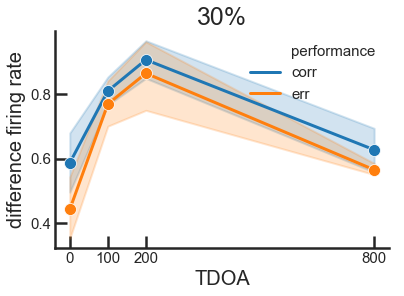

In [62]:
#
sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('30%', fontsize=25)
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


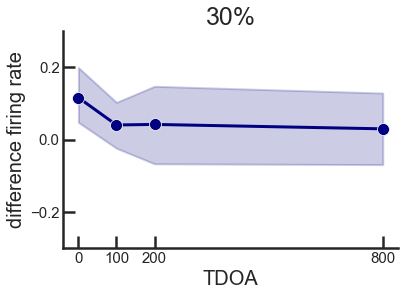

In [73]:
diff_=[]
for n in df_pfc.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_.append([diff, TDOA, n])

diff_=pd.DataFrame(diff_)
diff_.columns=['c-w', 'TDOA', 'neuron']
diff_


sns.lineplot(x="TDOA", y="c-w",ci=68, color='navy',
             data=diff_, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('30%', fontsize=25)
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.3, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})

In [60]:
pfc_2=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in other_:
        corr_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>TDOA) & (df['time_centered']<TDOA+100), 'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>TDOA) & (df['time_centered']<TDOA+100), 'norm_firing_gauss'].mean() 
        pfc_2.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_2.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc2=pd.DataFrame(pfc_2)
df_pfc2.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


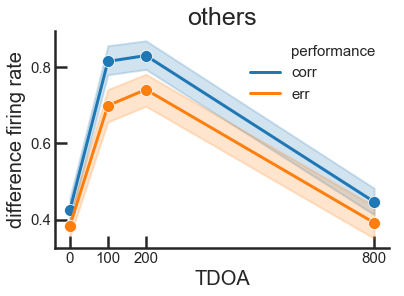

In [61]:
sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc2, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('others', fontsize=25)
plt.ylabel('mean firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


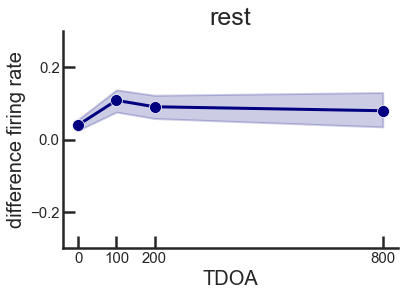

In [78]:
diff_2=[]
for n in df_pfc2.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_2.append([diff, TDOA, n])

diff_2=pd.DataFrame(diff_2)
diff_2.columns=['c-w', 'TDOA', 'neuron']
diff_2


sns.lineplot(x="TDOA", y="c-w",ci=68, color='navy',
             data=diff_2, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('rest', fontsize=25)
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.3, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


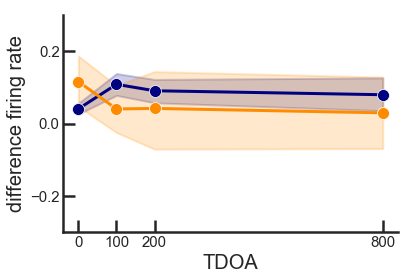

In [79]:
sns.lineplot(x="TDOA", y="c-w",ci=68, color='navy',
             data=diff_2, marker="o")

sns.lineplot(x="TDOA", y="c-w",ci=68, color='darkorange',
             data=diff_, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.3, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


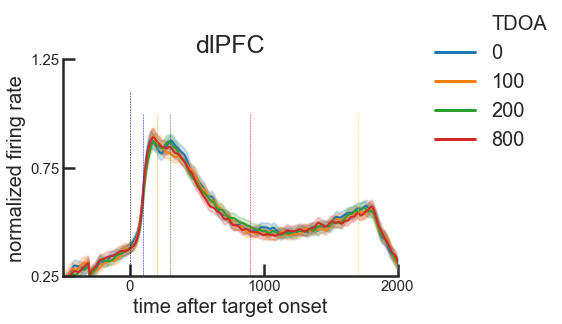

In [31]:
Pal = sns.color_palette("tab10")[:4]

df_x = df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') &
                     (df['performance']==1) ]


sns.lineplot(x='time_centered', y='norm_firing_gauss', hue='TDOA', data=df_x, palette=Pal, linewidth=2)
plt.xlim(-500, 2000)
plt.ylim(0.25,1.25)
plt.yticks([0.25,0.75,1.25])
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 20})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#
plt.plot([0,0], [0,1.1], 'k--', linewidth=0.5)
plt.plot([100,100], [0,1], '--',  color='blue', linewidth=0.5)
plt.plot([200,200], [0,1], '--', color='darkorange', linewidth=0.5)
plt.plot([300,300], [0,1], '--', color='green', linewidth=0.5)
plt.plot([900,900], [0,1], '--', color='red', linewidth=0.5)
plt.plot([1700,1700], [0,1], '--',  color='gold', linewidth=0.5)

In [76]:
df

,Unnamed: 0,firing_gauss,times,trial,TDOA,TDconf,targetloc,distLoc,fixationtime,perfromance_code,saccadeChoice,cueDuration,distDur,monkey,neuron,brain_region,rf_loc,performance,norm_firing_gauss,time_centered
0,0,0.025193,0,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,1,0.846866,-500
1,1,0.025486,10,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,1,0.856722,-490
2,2,0.018175,20,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,1,0.610950,-480
3,3,0.015012,30,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,1,0.504622,-470
4,4,0.024514,40,0,800,1,0,1,500,1,0,100,100,Mojo,1364705,LIP,135,1,0.824021,-460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167085,295,0.118729,2950,561,100,4,3,0,300,3,7,100,100,Speriatus,189210901,DLPFC,45,0,2.005504,2650
167086,296,0.142300,2960,561,100,4,3,0,300,3,7,100,100,Speriatus,189210901,DLPFC,45,0,2.403651,2660
167087,297,0.155348,2970,561,100,4,3,0,300,3,7,100,100,Speriatus,189210901,DLPFC,45,0,2.624045,2670
167088,298,0.153596,2980,561,100,4,3,0,300,3,7,100,100,Speriatus,189210901,DLPFC,45,0,2.594445,2680


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


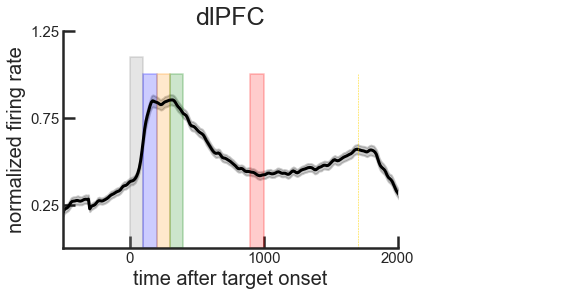

In [193]:
df_x = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') &
                     (df['performance']==1) ]


sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_x, color='black', linewidth=3)
plt.xlim(-500, 2000)
plt.ylim(0.,1.25)
plt.yticks([0.25,0.75,1.25])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.fill_between([0,99], [1.1, 1.1], color='grey', alpha=0.2)
plt.fill_between([100,199], [1, 1], color='blue', alpha=0.2)
plt.fill_between([200,299], [1, 1], color='darkorange', alpha=0.2)
plt.fill_between([300,399], [1, 1], color='green', alpha=0.2)
plt.fill_between([900,999], [1, 1], color='red', alpha=0.2)
plt.plot([1700,1700], [0,1], '--',  color='gold', linewidth=0.5)
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 0})


In [81]:
## When is the peak for target presentatio?

In [96]:
mean_times = [df_x.groupby('time_centered').get_group(t)['norm_firing_gauss'].mean() for t in np.sort(df_x.time_centered.unique())]

(-500, 2000)

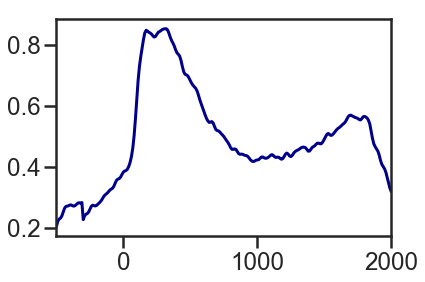

In [114]:
times_cent2 = np.sort(df_x.time_centered.unique())[30:281]
mean_times2 = mean_times[30:281]
plt.plot(times_cent2, mean_times2, 'darkblue')
plt.xlim(-500, 2000)


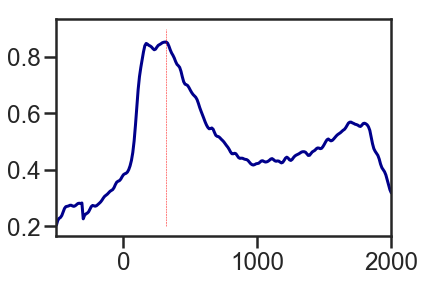

In [121]:
MAX = times_cent2[np.where(mean_times2==max(mean_times2))[0][0]]
plt.plot(times_cent2, mean_times2, 'darkblue')
plt.xlim(-500, 2000)
plt.plot([MAX,MAX], [0.2, 0.9], 'r--', linewidth=0.5)

170

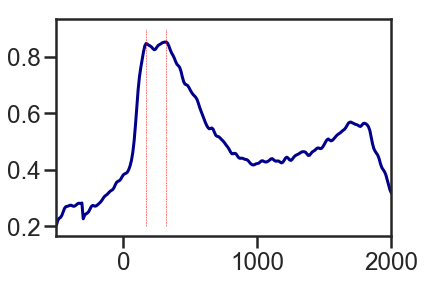

In [179]:
import scipy
from scipy.signal import find_peaks
PEAKS = scipy.signal.find_peaks(mean_times2, height=0.6) #, threshold=0.002
PEAKS = list(PEAKS[0])
#print(PEAKS);
plt.plot(times_cent2, mean_times2, 'darkblue')
plt.xlim(-500, 2000)

for p in PEAKS:
    plt.plot([times_cent2[p], times_cent2[p]], [0.2, 0.9], 'r--', linewidth=0.5)
    
###
time_first_peak=times_cent2[PEAKS[0]]
time_first_peak

In [ ]:
#### Use the time peak as the moment it takes to the target to arrive PFC!

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


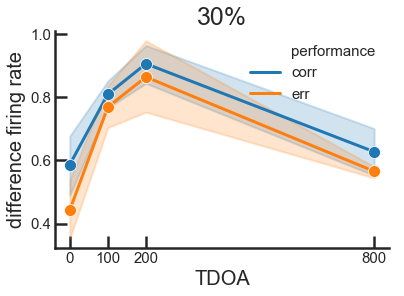

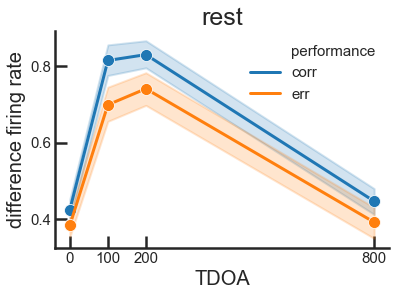

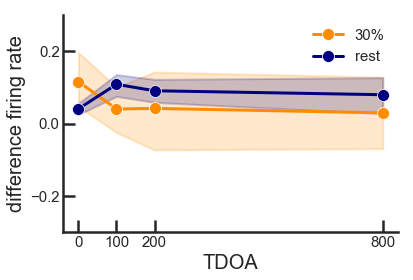

In [231]:
time_first_peak=0

###subgroup of neurons (30% based on CTD)
pfc_=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in therty:
        corr_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100),
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                 'norm_firing_gauss'].mean() 
        pfc_.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc=pd.DataFrame(pfc_)
df_pfc.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


###rest of neurons in Speriatus
pfc_2=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in other_:
        corr_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        pfc_2.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_2.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc2=pd.DataFrame(pfc_2)
df_pfc2.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('30%', fontsize=25)
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc2, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('rest', fontsize=25)
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15});
plt.show()


diff_=[]
for n in df_pfc.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_.append([diff, TDOA, n])

diff_=pd.DataFrame(diff_)
diff_.columns=['c-w', 'TDOA', 'neuron']


diff_2=[]
for n in df_pfc2.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_2.append([diff, TDOA, n])

diff_2=pd.DataFrame(diff_2)
diff_2.columns=['c-w', 'TDOA', 'neuron']



sns.lineplot(x="TDOA", y="c-w",ci=68, color='darkorange',
             data=diff_, marker="o", label='30%')

sns.lineplot(x="TDOA", y="c-w",ci=68, color='navy',
             data=diff_2, marker="o", label='rest')

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.3, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


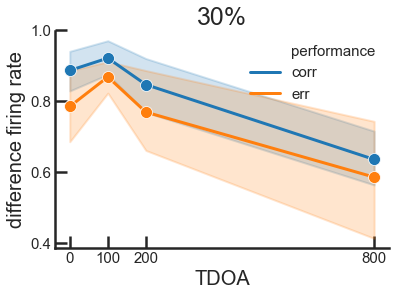

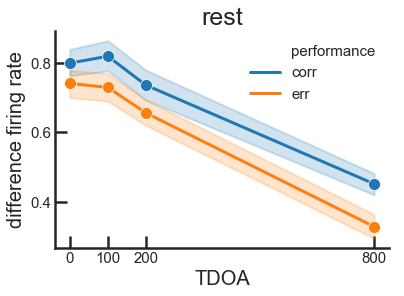

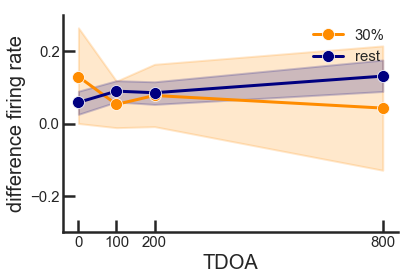

In [232]:
time_first_peak=170

###subgroup of neurons (30% based on CTD)
pfc_=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in therty:
        corr_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100),
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                 'norm_firing_gauss'].mean() 
        pfc_.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc=pd.DataFrame(pfc_)
df_pfc.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


###rest of neurons in Speriatus
pfc_2=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in other_:
        corr_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        pfc_2.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_2.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc2=pd.DataFrame(pfc_2)
df_pfc2.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('30%', fontsize=25)
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc2, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('rest', fontsize=25)
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15});
plt.show()


diff_=[]
for n in df_pfc.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_.append([diff, TDOA, n])

diff_=pd.DataFrame(diff_)
diff_.columns=['c-w', 'TDOA', 'neuron']


diff_2=[]
for n in df_pfc2.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_2.append([diff, TDOA, n])

diff_2=pd.DataFrame(diff_2)
diff_2.columns=['c-w', 'TDOA', 'neuron']



sns.lineplot(x="TDOA", y="c-w",ci=68, color='darkorange',
             data=diff_, marker="o", label='30%')

sns.lineplot(x="TDOA", y="c-w",ci=68, color='navy',
             data=diff_2, marker="o", label='rest')

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.3, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


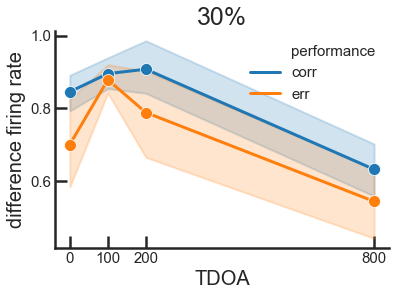

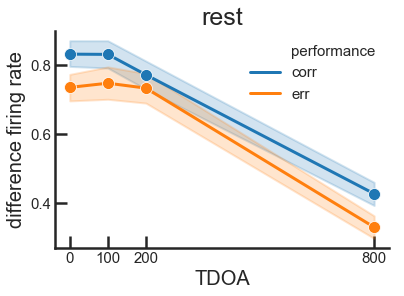

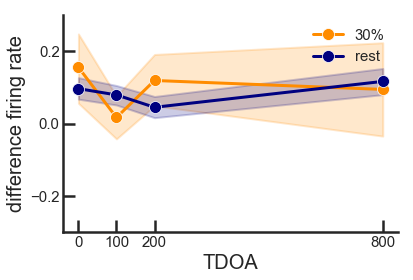

In [233]:
time_first_peak=120

###subgroup of neurons (30% based on CTD)
pfc_=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in therty:
        corr_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100),
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                 'norm_firing_gauss'].mean() 
        pfc_.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc=pd.DataFrame(pfc_)
df_pfc.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


###rest of neurons in Speriatus
pfc_2=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in other_:
        corr_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        pfc_2.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_2.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc2=pd.DataFrame(pfc_2)
df_pfc2.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('30%', fontsize=25)
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc2, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('rest', fontsize=25)
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15});
plt.show()


diff_=[]
for n in df_pfc.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_.append([diff, TDOA, n])

diff_=pd.DataFrame(diff_)
diff_.columns=['c-w', 'TDOA', 'neuron']


diff_2=[]
for n in df_pfc2.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_2.append([diff, TDOA, n])

diff_2=pd.DataFrame(diff_2)
diff_2.columns=['c-w', 'TDOA', 'neuron']



sns.lineplot(x="TDOA", y="c-w",ci=68, color='darkorange',
             data=diff_, marker="o", label='30%')

sns.lineplot(x="TDOA", y="c-w",ci=68, color='navy',
             data=diff_2, marker="o", label='rest')

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.3, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


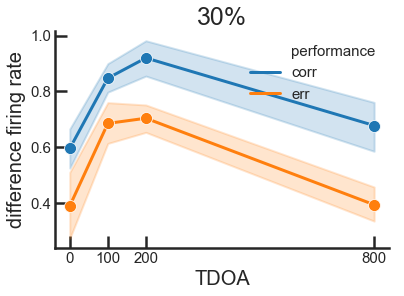

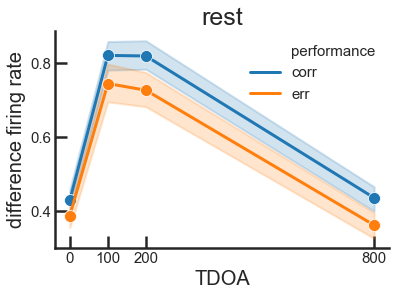

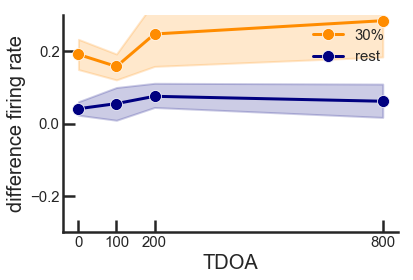

In [234]:
### FAR
time_first_peak=0

###subgroup of neurons (30% based on CTD)
pfc_=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in therty:
        corr_= df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100),
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                 'norm_firing_gauss'].mean() 
        pfc_.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc=pd.DataFrame(pfc_)
df_pfc.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


###rest of neurons in Speriatus
pfc_2=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in other_:
        corr_= df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        pfc_2.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_2.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc2=pd.DataFrame(pfc_2)
df_pfc2.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('30%', fontsize=25)
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc2, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('rest', fontsize=25)
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15});
plt.show()


diff_=[]
for n in df_pfc.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_.append([diff, TDOA, n])

diff_=pd.DataFrame(diff_)
diff_.columns=['c-w', 'TDOA', 'neuron']


diff_2=[]
for n in df_pfc2.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_2.append([diff, TDOA, n])

diff_2=pd.DataFrame(diff_2)
diff_2.columns=['c-w', 'TDOA', 'neuron']



sns.lineplot(x="TDOA", y="c-w",ci=68, color='darkorange',
             data=diff_, marker="o", label='30%')

sns.lineplot(x="TDOA", y="c-w",ci=68, color='navy',
             data=diff_2, marker="o", label='rest')

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.3, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


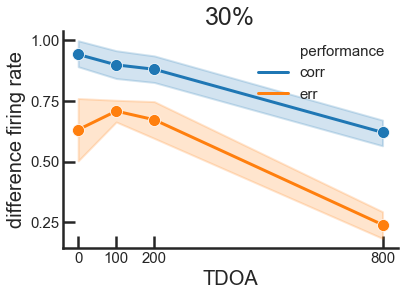

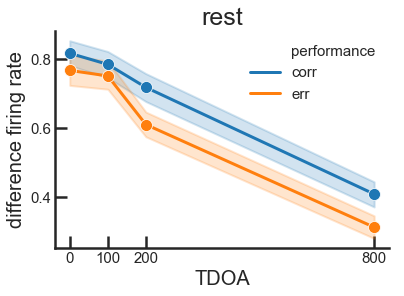

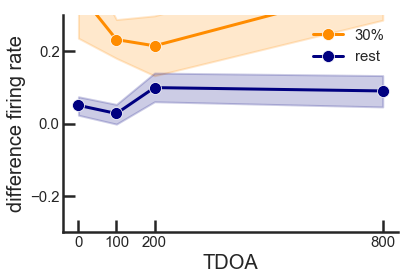

In [244]:
### FAR 
time_first_peak=170

###subgroup of neurons (30% based on CTD)
pfc_=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in therty:
        corr_= df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100),
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                 'norm_firing_gauss'].mean() 
        pfc_.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc=pd.DataFrame(pfc_)
df_pfc.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


###rest of neurons in Speriatus
pfc_2=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in other_:
        corr_= df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        pfc_2.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_2.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc2=pd.DataFrame(pfc_2)
df_pfc2.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('30%', fontsize=25)
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc2, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('rest', fontsize=25)
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15});
plt.show()


diff_=[]
for n in df_pfc.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_.append([diff, TDOA, n])

diff_=pd.DataFrame(diff_)
diff_.columns=['c-w', 'TDOA', 'neuron']


diff_2=[]
for n in df_pfc2.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_2.append([diff, TDOA, n])

diff_2=pd.DataFrame(diff_2)
diff_2.columns=['c-w', 'TDOA', 'neuron']



sns.lineplot(x="TDOA", y="c-w",ci=68, color='darkorange',
             data=diff_, marker="o", label='30%')

sns.lineplot(x="TDOA", y="c-w",ci=68, color='navy',
             data=diff_2, marker="o", label='rest')

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.3, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


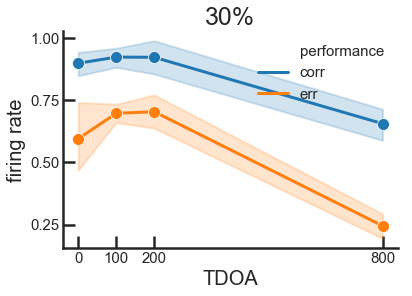

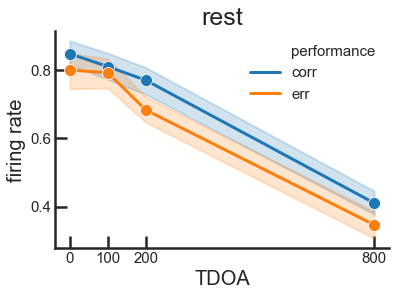

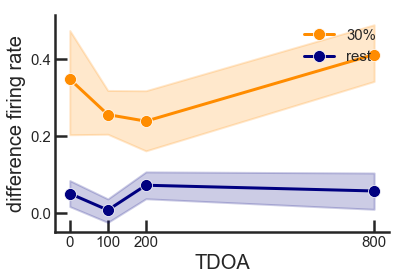

In [246]:
### FAR 
time_first_peak=120

###subgroup of neurons (30% based on CTD)
pfc_=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in therty:
        corr_= df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100),
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                 'norm_firing_gauss'].mean() 
        pfc_.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc=pd.DataFrame(pfc_)
df_pfc.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


###rest of neurons in Speriatus
pfc_2=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in other_:
        corr_= df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf']==2) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        pfc_2.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_2.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc2=pd.DataFrame(pfc_2)
df_pfc2.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('30%', fontsize=25)
plt.ylabel('firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc2, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('rest', fontsize=25)
plt.ylabel('firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15});
plt.show()


diff_=[]
for n in df_pfc.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_.append([diff, TDOA, n])

diff_=pd.DataFrame(diff_)
diff_.columns=['c-w', 'TDOA', 'neuron']


diff_2=[]
for n in df_pfc2.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_2.append([diff, TDOA, n])

diff_2=pd.DataFrame(diff_2)
diff_2.columns=['c-w', 'TDOA', 'neuron']



sns.lineplot(x="TDOA", y="c-w",ci=68, color='darkorange',
             data=diff_, marker="o", label='30%')

sns.lineplot(x="TDOA", y="c-w",ci=68, color='navy',
             data=diff_2, marker="o", label='rest')

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.3, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


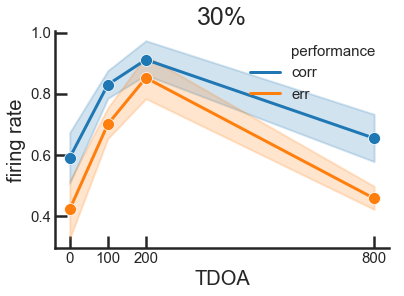

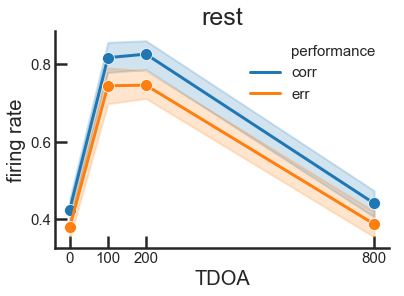

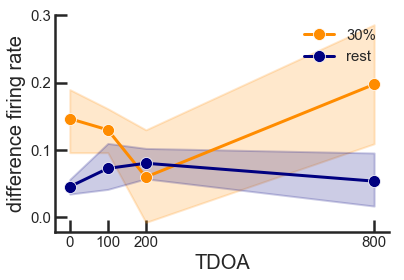

In [250]:
### CLOSE & FAR 
time_first_peak=0

###subgroup of neurons (30% based on CTD)
pfc_=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in therty:
        corr_= df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100),
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                 'norm_firing_gauss'].mean() 
        pfc_.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc=pd.DataFrame(pfc_)
df_pfc.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


###rest of neurons in Speriatus
pfc_2=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in other_:
        corr_= df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        pfc_2.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_2.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc2=pd.DataFrame(pfc_2)
df_pfc2.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('30%', fontsize=25)
plt.ylabel('firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc2, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('rest', fontsize=25)
plt.ylabel('firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15});
plt.show()


diff_=[]
for n in df_pfc.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_.append([diff, TDOA, n])

diff_=pd.DataFrame(diff_)
diff_.columns=['c-w', 'TDOA', 'neuron']


diff_2=[]
for n in df_pfc2.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_2.append([diff, TDOA, n])

diff_2=pd.DataFrame(diff_2)
diff_2.columns=['c-w', 'TDOA', 'neuron']



sns.lineplot(x="TDOA", y="c-w",ci=68, color='darkorange',
             data=diff_, marker="o", label='30%')

sns.lineplot(x="TDOA", y="c-w",ci=68, color='navy',
             data=diff_2, marker="o", label='rest')

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.3, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


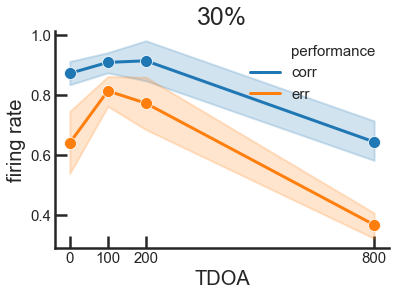

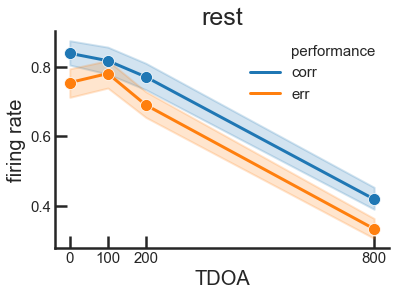

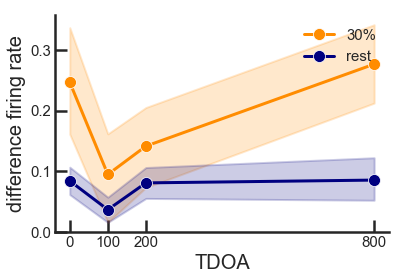

In [251]:
### CLOSE & FAR 
time_first_peak=120

###subgroup of neurons (30% based on CTD)
pfc_=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in therty:
        corr_= df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100),
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                 'norm_firing_gauss'].mean() 
        pfc_.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc=pd.DataFrame(pfc_)
df_pfc.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


###rest of neurons in Speriatus
pfc_2=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in other_:
        corr_= df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        pfc_2.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_2.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc2=pd.DataFrame(pfc_2)
df_pfc2.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('30%', fontsize=25)
plt.ylabel('firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc2, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('rest', fontsize=25)
plt.ylabel('firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15});
plt.show()


diff_=[]
for n in df_pfc.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_.append([diff, TDOA, n])

diff_=pd.DataFrame(diff_)
diff_.columns=['c-w', 'TDOA', 'neuron']


diff_2=[]
for n in df_pfc2.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_2.append([diff, TDOA, n])

diff_2=pd.DataFrame(diff_2)
diff_2.columns=['c-w', 'TDOA', 'neuron']



sns.lineplot(x="TDOA", y="c-w",ci=68, color='darkorange',
             data=diff_, marker="o", label='30%')

sns.lineplot(x="TDOA", y="c-w",ci=68, color='navy',
             data=diff_2, marker="o", label='rest')

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.3, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


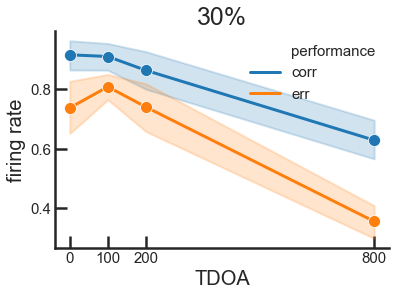

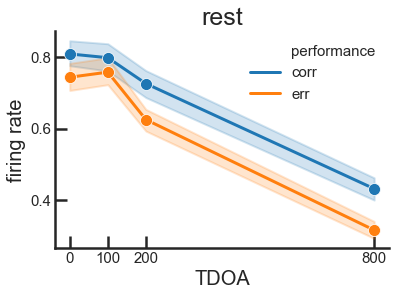

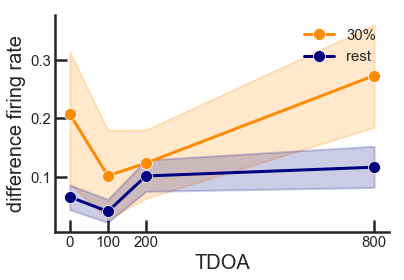

In [252]:
### CLOSE & FAR 
time_first_peak=170

###subgroup of neurons (30% based on CTD)
pfc_=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in therty:
        corr_= df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100),
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                 'norm_firing_gauss'].mean() 
        pfc_.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc=pd.DataFrame(pfc_)
df_pfc.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


###rest of neurons in Speriatus
pfc_2=[]

for TDOA in [0, 100, 200, 800]:
    for neuron in other_:
        corr_= df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==1) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        err_= df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & 
                 (df['performance']==0) & (df['TDOA']==TDOA) & 
                 (df['neuron']==neuron) & 
                 (df['time_centered']>time_first_peak+TDOA) & (df['time_centered']<time_first_peak+TDOA+100), 
                'norm_firing_gauss'].mean() 
        pfc_2.append([corr_, TDOA, 'corr', neuron, 'dlpfc'])
        pfc_2.append([err_, TDOA, 'err', neuron, 'dlpfc'])
#
df_pfc2=pd.DataFrame(pfc_2)
df_pfc2.columns=['norm_firing_gauss', 'TDOA', 'performance', 'neuron', 'area']


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('30%', fontsize=25)
plt.ylabel('firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()


sns.lineplot(x="TDOA", y="norm_firing_gauss", hue='performance', ci=68, palette='tab10',
             data=df_pfc2, marker="o")

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('rest', fontsize=25)
plt.ylabel('firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.05, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15});
plt.show()


diff_=[]
for n in df_pfc.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc.loc[(df_pfc['TDOA']==TDOA) & (df_pfc['neuron']==n) & (df_pfc['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_.append([diff, TDOA, n])

diff_=pd.DataFrame(diff_)
diff_.columns=['c-w', 'TDOA', 'neuron']


diff_2=[]
for n in df_pfc2.neuron.unique():
    for TDOA in [0, 100, 200, 800]:
        c = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='corr'), 'norm_firing_gauss'].iloc[0]
        w = df_pfc2.loc[(df_pfc2['TDOA']==TDOA) & (df_pfc2['neuron']==n) & (df_pfc2['performance']=='err'), 'norm_firing_gauss'].iloc[0]
        diff = c-w
        diff_2.append([diff, TDOA, n])

diff_2=pd.DataFrame(diff_2)
diff_2.columns=['c-w', 'TDOA', 'neuron']



sns.lineplot(x="TDOA", y="c-w",ci=68, color='darkorange',
             data=diff_, marker="o", label='30%')

sns.lineplot(x="TDOA", y="c-w",ci=68, color='navy',
             data=diff_2, marker="o", label='rest')

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('difference firing rate', fontsize=20)
plt.xlabel('TDOA', fontsize=20)
plt.xticks([0,100,200, 800])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(-0.3, 0.3)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.show()

In [257]:
df.perfromance_code.unique()

array([ 1, 15,  8,  3, 11, 13,  2], dtype=int64)

In [256]:
df.perfromance_code.unique()

array([ 1, 15,  8,  3, 11, 13,  2], dtype=int64)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


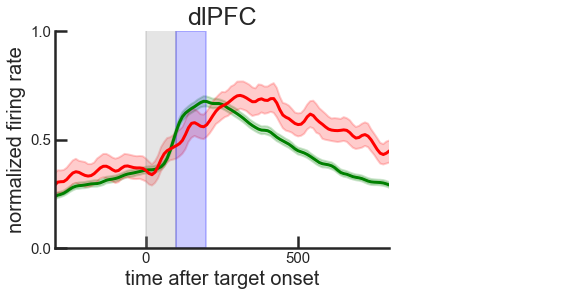

In [259]:
df_c = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') &
                     (df['performance']==1) & (df['TDOA']==0) ]

df_w = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') &
                     (df['performance']==0) & (df['TDOA']==0) & (df['perfromance_code'].isin([15]))]

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_c, color='green', linewidth=3)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_w, color='red', linewidth=3)

plt.xlim(-300, 800)
plt.ylim(0.,1)
plt.yticks([0., 0.5, 1])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.fill_between([0,99], [1.1, 1.1], color='grey', alpha=0.2)
plt.fill_between([100,199], [1, 1], color='blue', alpha=0.2)
# plt.fill_between([200,299], [1, 1], color='darkorange', alpha=0.2)
# plt.fill_between([300,399], [1, 1], color='green', alpha=0.2)
# plt.fill_between([900,999], [1, 1], color='red', alpha=0.2)
# plt.plot([1700,1700], [0,1], '--',  color='gold', linewidth=0.5)
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 0})

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


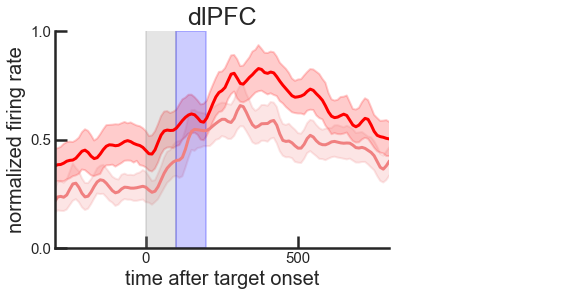

In [261]:
df_w = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & 
              (df['neuron'].isin(fifty)) &
              (df['performance']==0) & (df['TDOA']==0) & (df['perfromance_code'].isin([15]))]

df_w2 = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & 
              (~df['neuron'].isin(fifty)) &
              (df['performance']==0) & (df['TDOA']==0) & (df['perfromance_code'].isin([15]))]


sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_w, color='red', linewidth=3)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_w2, color='lightcoral', linewidth=3)

plt.xlim(-300, 800)
plt.ylim(0.,1)
plt.yticks([0., 0.5, 1])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.fill_between([0,99], [1.1, 1.1], color='grey', alpha=0.2)
plt.fill_between([100,199], [1, 1], color='blue', alpha=0.2)
# plt.fill_between([200,299], [1, 1], color='darkorange', alpha=0.2)
# plt.fill_between([300,399], [1, 1], color='green', alpha=0.2)
# plt.fill_between([900,999], [1, 1], color='red', alpha=0.2)
# plt.plot([1700,1700], [0,1], '--',  color='gold', linewidth=0.5)
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 0})




C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


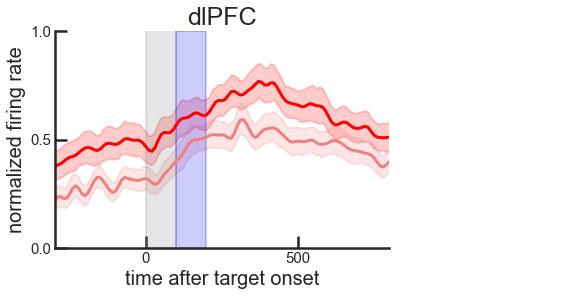

In [265]:
##all TDOA together: separate wrong of subpopulation from rest
df_w = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & 
              (df['neuron'].isin(fifty)) &
              (df['performance']==0)  & (df['perfromance_code'].isin([15]))]

df_w2 = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & 
              (~df['neuron'].isin(fifty)) &
              (df['performance']==0) & (df['perfromance_code'].isin([15]))]


sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_w, color='red', linewidth=3)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_w2, color='lightcoral', linewidth=3)

plt.xlim(-300, 800)
plt.ylim(0.,1)
plt.yticks([0., 0.5, 1])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.fill_between([0,99], [1.1, 1.1], color='grey', alpha=0.2)
plt.fill_between([100,199], [1, 1], color='blue', alpha=0.2)
# plt.fill_between([200,299], [1, 1], color='darkorange', alpha=0.2)
# plt.fill_between([300,399], [1, 1], color='green', alpha=0.2)
# plt.fill_between([900,999], [1, 1], color='red', alpha=0.2)
# plt.plot([1700,1700], [0,1], '--',  color='gold', linewidth=0.5)
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 0})




C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


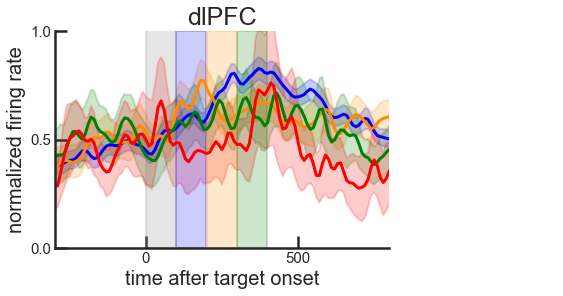

In [263]:
df_0 = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & 
              (df['neuron'].isin(fifty)) &
              (df['performance']==0) & (df['TDOA']==0) & (df['perfromance_code'].isin([15]))]

df_1 = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & 
              (df['neuron'].isin(fifty)) &
              (df['performance']==0) & (df['TDOA']==100) & (df['perfromance_code'].isin([15]))]


df_2 = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & 
              (df['neuron'].isin(fifty)) &
              (df['performance']==0) & (df['TDOA']==200) & (df['perfromance_code'].isin([15]))]

df_3 = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & 
              (df['neuron'].isin(fifty)) &
              (df['performance']==0) & (df['TDOA']==800) & (df['perfromance_code'].isin([15]))]

sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=68, data=df_0, color='blue', linewidth=3)
sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=68, data=df_1, color='darkorange', linewidth=3)
sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=68, data=df_2, color='green', linewidth=3)
sns.lineplot(x='time_centered', y='norm_firing_gauss', ci=68, data=df_3, color='red', linewidth=3)



plt.xlim(-300, 800)
plt.ylim(0.,1)
plt.yticks([0., 0.5, 1])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.fill_between([0,99], [1.1, 1.1], color='grey', alpha=0.2)
plt.fill_between([100,199], [1, 1], color='blue', alpha=0.2)
plt.fill_between([200,299], [1, 1], color='darkorange', alpha=0.2)
plt.fill_between([300,399], [1, 1], color='green', alpha=0.2)
plt.fill_between([900,999], [1, 1], color='red', alpha=0.2)
plt.plot([1700,1700], [0,1], '--',  color='gold', linewidth=0.5)
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 0})

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


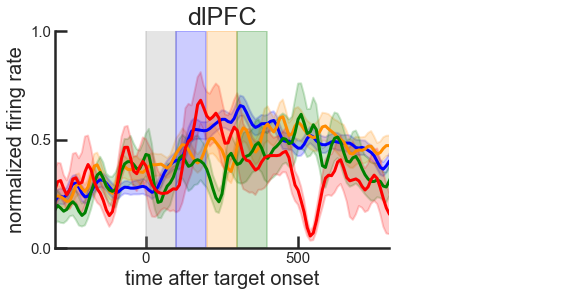

In [264]:
df_0 = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & 
              (~df['neuron'].isin(fifty)) &
              (df['performance']==0) & (df['TDOA']==0) & (df['perfromance_code'].isin([15]))]

df_1 = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & 
              (~df['neuron'].isin(fifty)) &
              (df['performance']==0) & (df['TDOA']==100) & (df['perfromance_code'].isin([15]))]


df_2 = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & 
              (~df['neuron'].isin(fifty)) &
              (df['performance']==0) & (df['TDOA']==200) & (df['perfromance_code'].isin([15]))]

df_3 = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') & 
              (~df['neuron'].isin(fifty)) &
              (df['performance']==0) & (df['TDOA']==800) & (df['perfromance_code'].isin([15]))]

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_0, ci=68, color='blue', linewidth=3)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_1, ci=68, color='darkorange', linewidth=3)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_2, ci=68, color='green', linewidth=3)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_3, ci=68, color='red', linewidth=3)



plt.xlim(-300, 800)
plt.ylim(0.,1)
plt.yticks([0., 0.5, 1])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.fill_between([0,99], [1.1, 1.1], color='grey', alpha=0.2)
plt.fill_between([100,199], [1, 1], color='blue', alpha=0.2)
plt.fill_between([200,299], [1, 1], color='darkorange', alpha=0.2)
plt.fill_between([300,399], [1, 1], color='green', alpha=0.2)
plt.fill_between([900,999], [1, 1], color='red', alpha=0.2)
plt.plot([1700,1700], [0,1], '--',  color='gold', linewidth=0.5)
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 0})

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


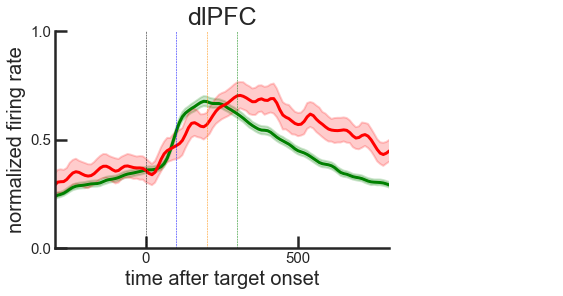

In [53]:
df_c = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') &
                     (df['performance']==1) & (df['TDOA']==0) ]

df_w = df.loc[(df['TDconf']==3) & (df['brain_region']=='DLPFC') &
                     (df['performance']==0) & (df['TDOA']==0) & (df['perfromance_code'].isin([15]))]

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_c, color='green', linewidth=3)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_w, color='red', linewidth=3)

plt.xlim(-300, 800)
plt.ylim(0.,1)
plt.yticks([0., 0.5, 1])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0,0], [0,1.1], 'k--', linewidth=0.5)
plt.plot([100,100], [0,1], '--',  color='blue', linewidth=0.5)
plt.plot([200,200], [0,1], '--', color='darkorange', linewidth=0.5)
plt.plot([300,300], [0,1], '--', color='green', linewidth=0.5)
plt.plot([900,900], [0,1], '--', color='red', linewidth=0.5)
plt.plot([1700,1700], [0,1], '--',  color='gold', linewidth=0.5)
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 0})

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


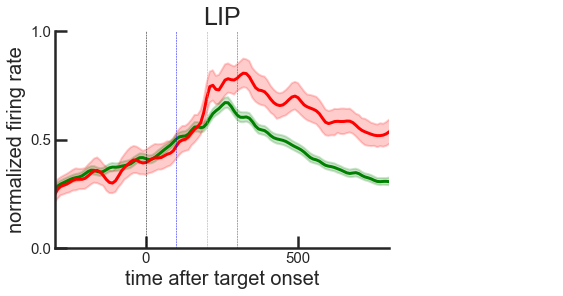

In [49]:
df_c = df.loc[(df['TDconf']==3) & (df['brain_region']=='LIP') &
                     (df['performance']==1) & (df['TDOA']==0)  ]

df_w = df.loc[(df['TDconf']==3) & (df['brain_region']=='LIP') &
                     (df['performance']==0) & (df['TDOA']==0) & (df['perfromance_code'].isin([15])) ]

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_c, color='green', linewidth=3)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_w, color='red', linewidth=3)

plt.xlim(-300, 800)
plt.ylim(0.,1)
plt.yticks([0., 0.5, 1])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('LIP', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0,0], [0,1.1], 'k--', linewidth=0.5)
plt.plot([100,100], [0,1], '--',  color='blue', linewidth=0.5)
plt.plot([200,200], [0,1], '--', color='darkorange', linewidth=0.5)
plt.plot([300,300], [0,1], '--', color='green', linewidth=0.5)
plt.plot([900,900], [0,1], '--', color='red', linewidth=0.5)
plt.plot([1700,1700], [0,1], '--',  color='gold', linewidth=0.5)
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 0})

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


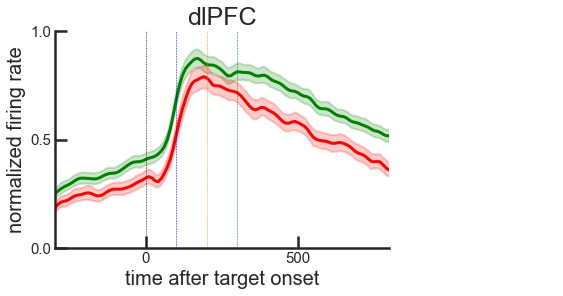

In [48]:
df_c = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') &
                     (df['performance']==1) & (df['TDOA']==0) ]

df_w = df.loc[(df['TDconf']==1) & (df['brain_region']=='DLPFC') &
                     (df['performance']==0) & (df['TDOA']==0) & (df['perfromance_code'].isin([15]))]

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_c, color='green', linewidth=3)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_w, color='red', linewidth=3)

plt.xlim(-300, 800)
plt.ylim(0.,1)
plt.yticks([0., 0.5, 1])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('dlPFC', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0,0], [0,1.1], 'k--', linewidth=0.5)
plt.plot([100,100], [0,1], '--',  color='blue', linewidth=0.5)
plt.plot([200,200], [0,1], '--', color='darkorange', linewidth=0.5)
plt.plot([300,300], [0,1], '--', color='green', linewidth=0.5)
plt.plot([900,900], [0,1], '--', color='red', linewidth=0.5)
plt.plot([1700,1700], [0,1], '--',  color='gold', linewidth=0.5)
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 0})

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


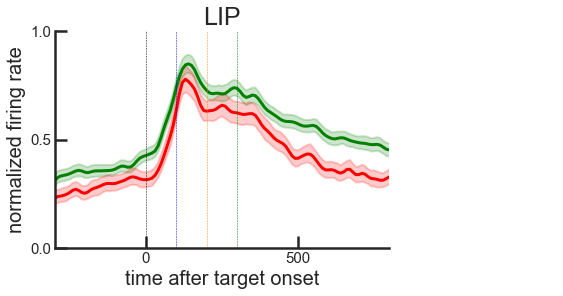

In [47]:
df_c = df.loc[(df['TDconf']==1) & (df['brain_region']=='LIP') &
                     (df['performance']==1) & (df['TDOA']==0)  ]

df_w = df.loc[(df['TDconf']==1) & (df['brain_region']=='LIP') &
                     (df['performance']==0) & (df['TDOA']==0)  & (df['perfromance_code'].isin([15])) ]

sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_c, color='green', linewidth=3)
sns.lineplot(x='time_centered', y='norm_firing_gauss', data=df_w, color='red', linewidth=3)

plt.xlim(-300, 800)
plt.ylim(0.,1)
plt.yticks([0., 0.5, 1])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('LIP', fontsize=25)
plt.ylabel('normalized firing rate', fontsize=20)
plt.xlabel('time after target onset', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0,0], [0,1.1], 'k--', linewidth=0.5)
plt.plot([100,100], [0,1], '--',  color='blue', linewidth=0.5)
plt.plot([200,200], [0,1], '--', color='darkorange', linewidth=0.5)
plt.plot([300,300], [0,1], '--', color='green', linewidth=0.5)
plt.plot([900,900], [0,1], '--', color='red', linewidth=0.5)
plt.plot([1700,1700], [0,1], '--',  color='gold', linewidth=0.5)
plt.legend( frameon=False, bbox_to_anchor=(1.5, 0.5), prop={'size': 0})

In [44]:
df['perfromance_code'].unique()

array([ 1, 15,  8,  3, 11, 13,  2], dtype=int64)

In [46]:
df['monkey'].unique()

array(['Mojo', 'Speriatus'], dtype=object)